# Lab 1 - Linear models and more

In this lab we will cover see how linear models can be used to fit more complex functions such as polynomials

Main concepts:

 * Feature extraction
 * Model complexity

## Imports and setup

The usual stuff:

 * Magic command `%matplotlib inline` so that plots are displayed correctly in the notebook.
 * `matplotlib` followed by `seaborn` in order to have fancy plots
 * `numpy` _et similia_ for number crunching.


In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt

import seaborn

import numpy as np

from numpy.linalg import inv

## Dataset generation

This time we want to generate points on a plane which lie on a slightly more complex curve, let's say a polynomial of order $3$

The samples will always be $(x_i, y_i)$ pairs with $x_i, y_i \in \mathbb{R}$, for $i = 1, \dots, n$, however the data will be generated using the following model:


$$
y_i = w_1 x_i + w_2 x_i^2 + w_3 x_i^3 c + \epsilon
$$

with $\epsilon \sim \mathcal{N}(0, \sigma^2)$

In [2]:
n = 100 # the number of samples

w1 = 1.3
w2 = 0.6
w3 = -1.5
c = 0.7

sigma = 0.3

np.random.seed(666)

def my_generate_ds(n, f, sigma=0.3):
    """
    Function used to generate synthetic data
    """
    
    X = np.random.uniform(-1, 1, size=(n,1))
    y = f(X)
    
    return X, y

f = lambda x : w1*x + w2*x**2 + w3*x**3 + c + np.random.normal(0, sigma**2, size=(n,1))


X, y = my_generate_ds(n, f)


## Plotting

Since data points lie on a plane, we can visualize them.

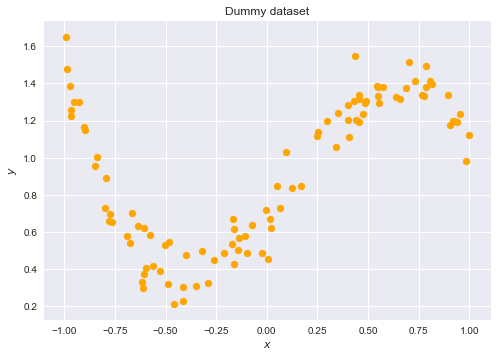

In [3]:
fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

## Fitting a polynomial using a linear model

It is possible to use OLS to fit a polynomial curve by using a _mapping the original features_ into an expanded set, similarly to what we did in the first lab when we added a column of ones to the input matrix $X$ in order to include the intercept.

This time we have to add several columns, one for each degree of the polynomial.

$$
\Phi(x) = \mathbf{x} = [1, x, x^2, x^3]^T
$$

Fitting a linear model on $(\Phi(X), \mathbf{y})$ will be equivalent to fitting a polynomial of degree $3$ on the original dataset $(X, \mathbf{y})$.

The vector $\mathbf{w}$ of coefficients will therefore have the form.

$$
\mathbf{w} = [c, w_1, w_2, w_3]^T
$$

In the cell below, define a function `Phi` that expands the input matrix by adding the required columns and a function `my_fit` that fits a linear model on the ($X$, $\mathbf{y}$) data points.

<img style="float: left;" src="info.png" width="20px"> &nbsp; **Reminder**: $\hat{\bf w} = (X^T X)^{-1} X^T {\bf y}$

In [4]:
### BEGIN STUDENTS ###

# def Phi(X, degree):
#     ...
#     ...
    
#     return X_new

# def my_fit(X, y):
#     ...
#     return w_hat

def Phi(X, degree=3):
    """
    Expand an n x 1 matrix into and n x d matrix,
    where in each column j there is X_i^j
    """
    
    n, d = X.shape
    
    l = [np.ones(shape=(n,1)), X]
    
    for j in range(2, degree+1):
        l.append(X**j)
    
    X_new = np.hstack(tuple(l))
    
    return X_new

def my_fit(X, y):
    
    w_hat = inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w_hat

### END STUDENTS ###

# Expand the original feature set
X_phi = Phi(X, 3)

# Fit the model
w_hat = my_fit(X_phi, y)

Plot the dataset again with the fitted curve on it. **Hint**: you can compute the predicted values for the $y$ for any input $X$ in a compact way

$$
\hat{\mathbf{y}} = \Phi(X)^T \hat{\mathbf{w}}
$$

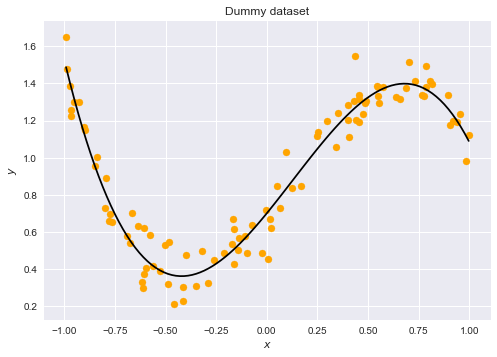

In [5]:
# Plot the points
fig, ax = plt.subplots()

ax.set_title("Dummy dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

# Generate points on the fitted curve
xmin = X.min()
xmax = X.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))
y_ticks = Phi(ticks).dot(w_hat)

# Plot the curve
ax.plot(ticks, y_ticks, 'k-');

## Model complexity

Until now, we sort of cheated while assuming that we already knew in advance which kind of curve we had to use to fit the available data.

In real life scenarios things are a bit more complicated.

Let's create a new dataset, this time where points are generated from a polynomial curve of degree 2 plus noise.

This time however, let's create few points, let's say just 8.

In [6]:
n = 8 # the number of samples

w1 = 1.3
w2 = -1.5
c = -0.7

sigma = 0.3

f = lambda x : w1*x + w2*x**2 + c + np.random.normal(0, sigma**2, size=(n,1))


np.random.seed(6)
X, y = my_generate_ds(n, f)

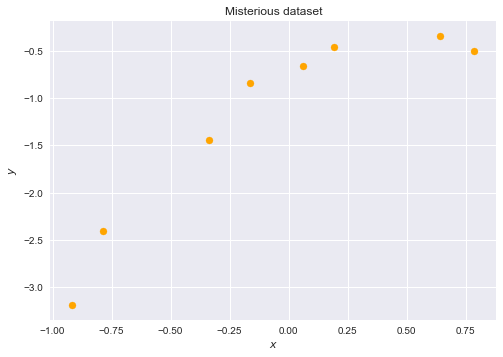

In [7]:
fig, ax = plt.subplots()

ax.set_title("Misterious dataset")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

Now try to fit three curves on these data:

* A straight line
* A polynomial of degree 2
* A polynomial of degree 3

<img style="float: left;" src="info.png" width="20px"> &nbsp; **Hint**: there is a simple way to create the code so that you only have to change ONE parameter (the degree of the polynomial) for each case.

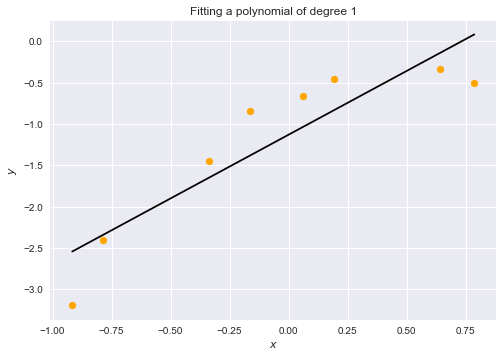

In [8]:
### BEGIN STUDENTS ###

# Expand the original feature set
# Set the degree of the polynomial
# j = 1
# X_phi = ...

# Fit the model
# w_hat = ...

j = 1
X_phi = Phi(X, j)


w_hat = my_fit(X_phi, y)
### END STUDENTS ###

# Plot the points
fig, ax = plt.subplots()

ax.set_title("Fitting a polynomial of degree {}".format(j))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

# Generate points on the fitted curve
xmin = X.min()
xmax = X.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))
y_ticks = Phi(ticks, j).dot(w_hat)

# Plot the curve
ax.plot(ticks, y_ticks, 'k-');

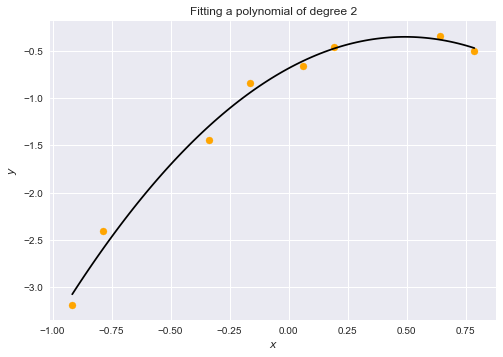

In [9]:
### BEGIN STUDENTS ###

# Expand the original feature set
# Set the degree of the polynomial
# j = ...
# X_phi = ...

# Fit the model
# w_hat = ...

j = 2
X_phi = Phi(X, j)

w_hat = my_fit(X_phi, y)

### END STUDENTS ###



# Plot the points
fig, ax = plt.subplots()

ax.set_title("Fitting a polynomial of degree {}".format(j))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

# Generate points on the fitted curve
xmin = X.min()
xmax = X.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))
y_ticks = Phi(ticks, j).dot(w_hat)

# Plot the curve
ax.plot(ticks, y_ticks, 'k-');

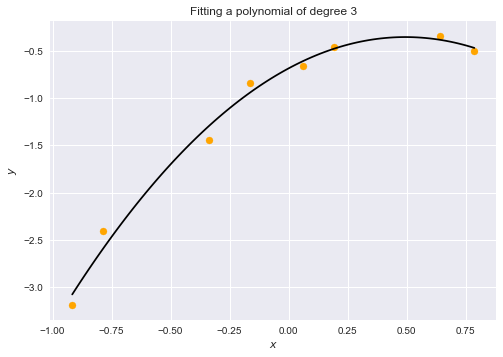

In [10]:
### BEGIN STUDENTS ###

# Expand the original feature set
# Set the degree of the polynomial
# j = ...
# X_phi = ...

# Fit the model
# w_hat = ...

j = 3
X_phi = Phi(X, j)

w_hat = my_fit(X_phi, y)

### END STUDENTS ###


# Plot the points
fig, ax = plt.subplots()

ax.set_title("Fitting a polynomial of degree {}".format(j))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

# Generate points on the fitted curve
xmin = X.min()
xmax = X.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))
y_ticks = Phi(ticks, j).dot(w_hat)

# Plot the curve
ax.plot(ticks, y_ticks, 'k-');

The last two fits should look almost the same. Looking at the 

In [11]:
print(w_hat)

[[-0.68339841]
 [ 1.3432798 ]
 [-1.37113547]
 [ 0.01392435]]


## One last thing

Now, try to fit a polynomial of order $7$ on this dataset. Before doing that, what do you expect to obtain, and why? Pretending you did not know how the data were originated (i.e., from a polynomial of order $2$), do you think this is a good fit?

Things will be revealed in the next lab.

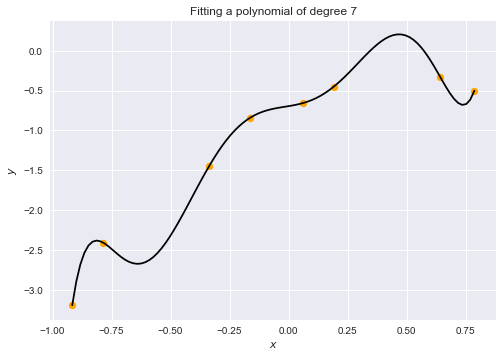

In [12]:
### BEGIN STUDENTS ###

# Expand the original feature set
# Set the degree of the polynomial
# j = ...
# X_phi = ...

# Fit the model
# w_hat = ...

j = 7
X_phi = Phi(X, j)

w_hat = my_fit(X_phi, y)

### END STUDENTS ###

# Plot the points
fig, ax = plt.subplots()

ax.set_title("Fitting a polynomial of degree {}".format(j))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.scatter(X, y, c=["orange"]);

# Generate points on the fitted curve
xmin = X.min()
xmax = X.max()

n_ticks = 100

ticks = np.linspace(xmin, xmax, 100).reshape((n_ticks, 1))
y_ticks = Phi(ticks, j).dot(w_hat)

# Plot the curve
ax.plot(ticks, y_ticks, 'k-');